In [1]:
import matplotlib
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pylab import *

import folium

from Wind.Util import find_exp, count_exp, sel_result
cpal = plt.get_cmap('Reds')

coords = np.load('../Data/coords.npy')

%matplotlib notebook

/usr/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.20) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# RNN Regdir

In [37]:
query1= {'status':'done', "arch.mode": "regdir", "experiment.type":"expbest", "data.datanames":{"$regex":"^0-.*"}}

count_exp(query1)
res1 = find_exp(query1)
sites1, coord1 = sel_result(res1,1)

valsum = np.sum(coord1,axis=1)
minsum = np.min(valsum)
rangesum = np.max(valsum) - minsum

print(minsum, rangesum)

500
6.199373931289458 3.350582886156877


In [38]:
mymap = folium.Map(location=[25.5,-85.2 ], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1, coord1):
    folium.features.CircleMarker(
        radius=10,
        location=[coords[i,0], coords[i,1]],
        color='#FFFFFF00',
        fill=True,
        fill_color=to_hex(cpal((np.sum(e)-minsum)/rangesum)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

In [39]:
pca = PCA()

ncoord1 = pca.fit_transform(coord1)

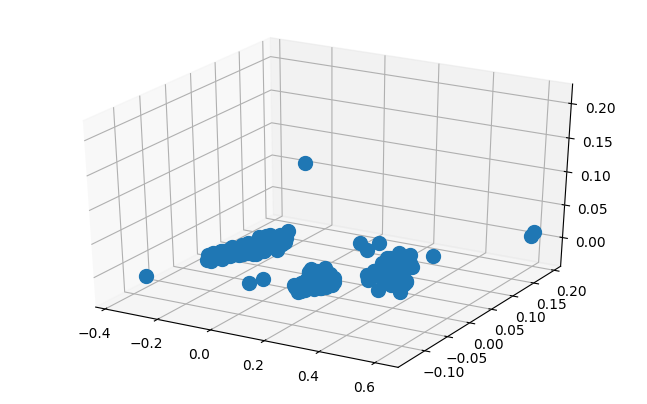

In [40]:
fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], depthshade=False, s=100)
plt.show()

[-1  0  1  2]


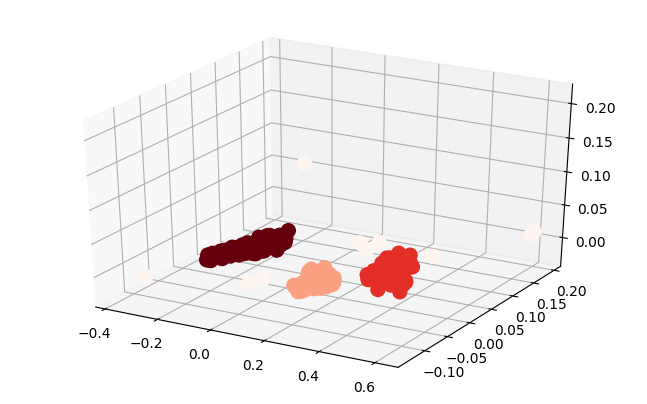

In [41]:
dbs = DBSCAN(eps=0.04, min_samples=5)

labels1 = dbs.fit_predict(ncoord1)
print(np.unique(labels1))
ncl = len(np.unique(labels1))

fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], c=[(l+1.0)/ncl for l in labels1], cmap=cpal, depthshade=False, s=100)
plt.show()



In [42]:

mymap = folium.Map(location=[25.5,-85.2 ], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1, [(l+1.0)/ncl for l in labels1]):
    folium.features.CircleMarker(
        radius=10,
        location=[coords[i,0], coords[i,1]],
        color=to_hex(cpal(e)),
        fill=True,
        fill_opacity=1
    ).add_to(mymap)
    
mymap

---

# MLP seq2seq

In [12]:
query2= {'status':'done', "arch.mode": "mlps2s", "experiment.type":"expbest", "data.datanames":{"$regex":"^0-.*"}}

count_exp(query2)
res2 = find_exp(query2)
sites2, coord2 = sel_result(res2,1)

valsum = np.sum(coord2,axis=1)
minsum = np.min(valsum)
rangesum = np.max(valsum) - minsum
print(minsum, rangesum)


500
7.53454196096061 2.0114117293728473


In [14]:
mymap = folium.Map(location=[25.5,-85.2 ], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites2, coord2):
    folium.features.CircleMarker(
        radius=10,
        location=[coords[i,0], coords[i,1]],
        color='#00000000',
        fill=True,
        fill_color=to_hex(cpal((np.sum(e)-minsum)/rangesum)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

In [15]:
pca = PCA()

ncoord2 = pca.fit_transform(coord2)

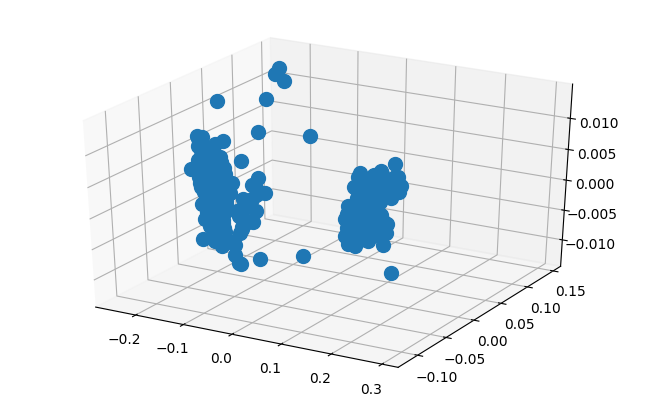

In [16]:
fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord2[:, 0], ncoord2[:, 1], zs=ncoord2[:, 2], depthshade=False, s=100)
plt.show()

[-1  0  1  2  3  4]


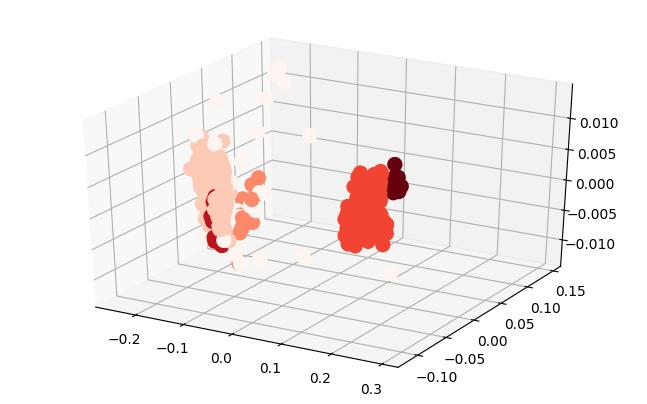

In [17]:
dbs = DBSCAN(eps=0.009, min_samples=5)

labels2 = dbs.fit_predict(ncoord2)
print(np.unique(labels2))
ncl = len(np.unique(labels2))

fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord2[:, 0], ncoord2[:, 1], zs=ncoord2[:, 2], c=[(l+1.0)/ncl for l in labels2], cmap=cpal, depthshade=False, s=100)
plt.show()

In [18]:
mymap = folium.Map(location=[25.5,-85.2 ], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites2, [(l+1.0)/ncl for l in labels2]):
    folium.features.CircleMarker(
        radius=10,
        location=[coords[i,0], coords[i,1]],
        color=to_hex(cpal(e)),
        fill=True,
        fill_opacity=1
    ).add_to(mymap)
    
mymap